In [ ]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [462]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [463]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [464]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [465]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


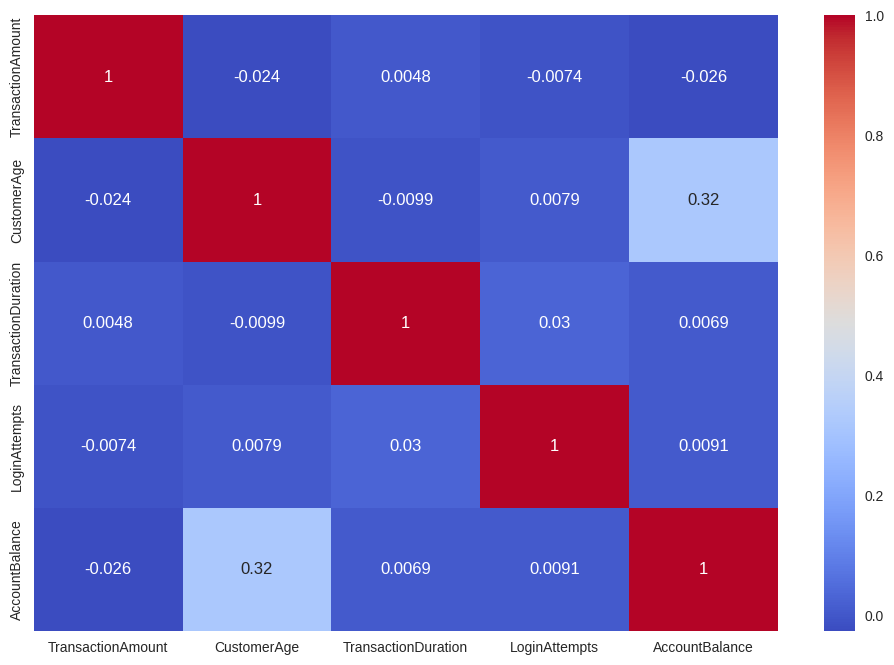

In [466]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

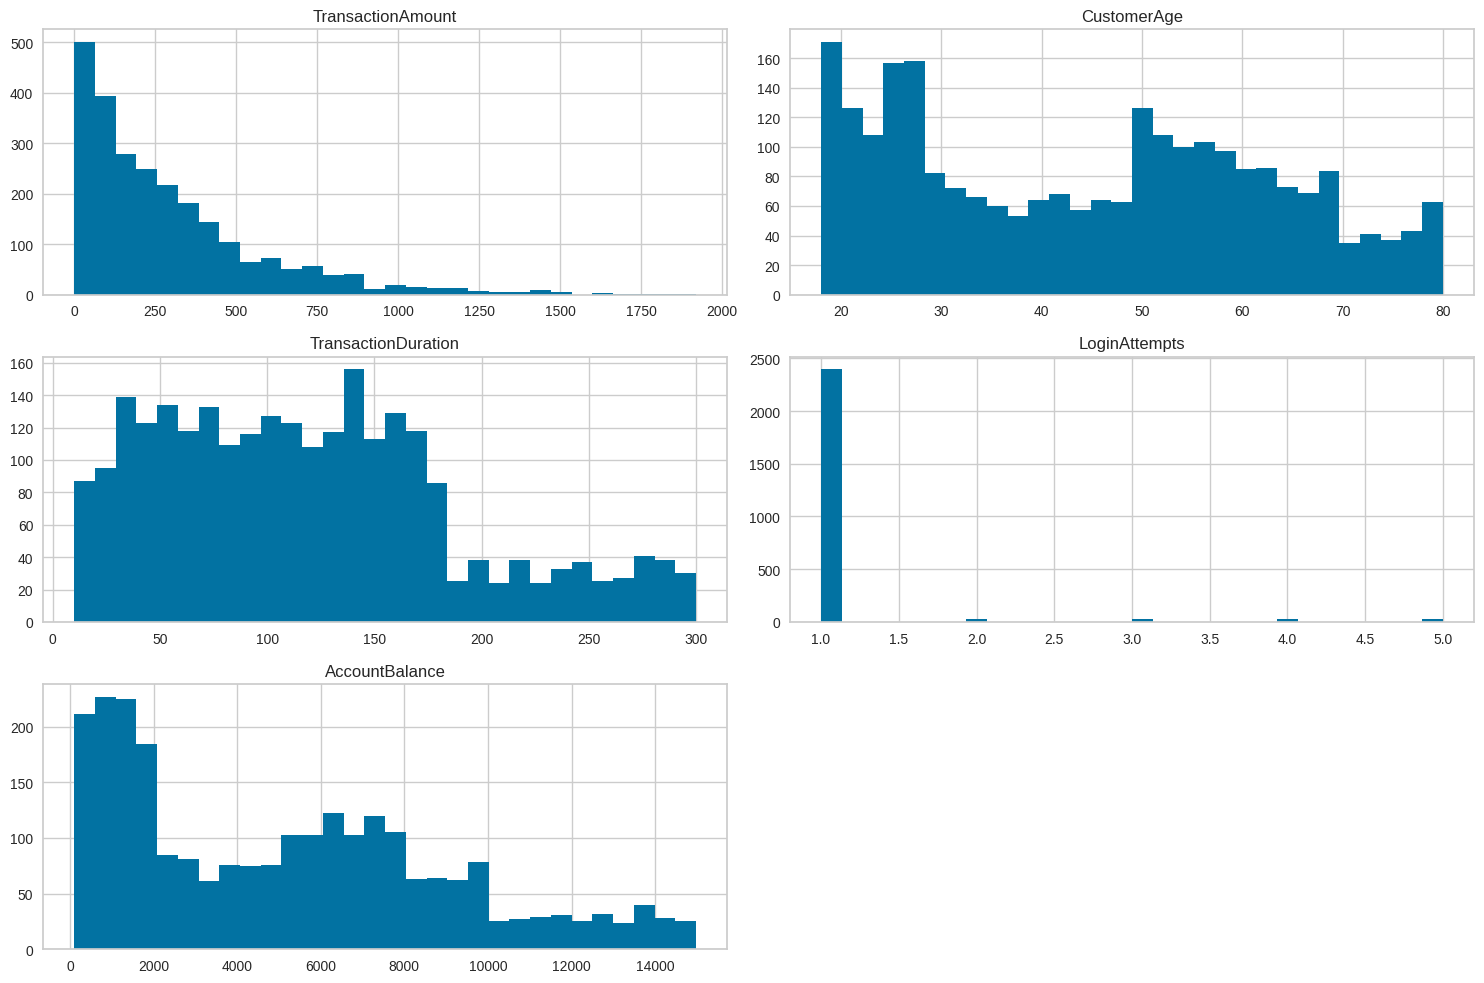

In [467]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

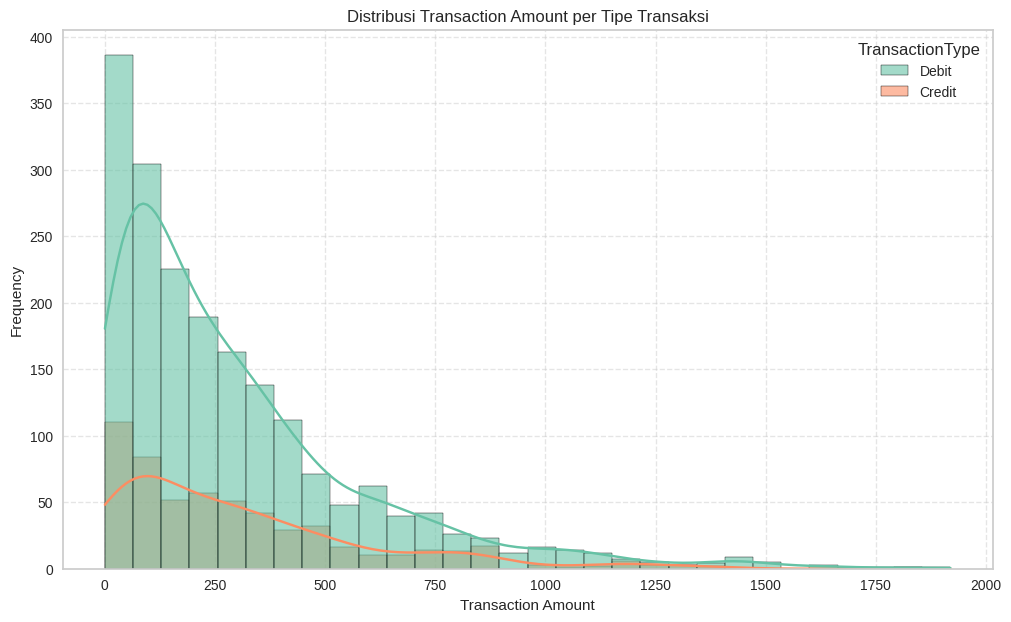

In [468]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(12,7))
sns.histplot(
    data=df,
    x='TransactionAmount',
    hue='TransactionType',
    bins=30,
    kde=True,
    palette='Set2',
    alpha=0.6
)
plt.title("Distribusi Transaction Amount per Tipe Transaksi")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [469]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [470]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [471]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numerical_cols = ['TransactionAmount','AccountBalance','CustomerAge','TransactionDuration','LoginAttempts']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Pastikan kamu menggunakan function head setelah melalukan scaling.
df[numerical_cols].head()

,TransactionAmount,AccountBalance,CustomerAge,TransactionDuration,LoginAttempts
0,0.007207,0.336832,0.838710,0.244828,0.0
1,0.195940,0.918055,0.806452,0.451724,0.0
2,0.065680,0.068637,0.016129,0.158621,0.0
3,0.096016,0.569198,0.129032,0.051724,0.0
4,0.006874,0.492591,NaN,0.648276,0.0


In [472]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID','AccountID','DeviceID','MerchantID','IP Address', 'TransactionDate', 'PreviousTransactionDate'])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [473]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [474]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [475]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

In [476]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

In [477]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df['CustomerAge'].quantile(0.25)
Q3 = df['CustomerAge'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['CustomerAge'] < (Q1 - 1.5 * IQR)) | (df['CustomerAge'] > (Q3 + 1.5 * IQR)))]

In [478]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
bins = [df['AccountBalance'].min()-0.01, 0.33, 0.66, df['AccountBalance'].max()+0.01]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['AccountBalance_Binned'] = pd.cut(df['AccountBalance'], bins=bins, labels=labels)

le = LabelEncoder()
df['AccountBalance_Binned'] = le.fit_transform(df['AccountBalance_Binned'].astype(str))

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountBalance_Binned
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000
mean,0.154944,0.788903,21.375887,1.013350,0.429441,1.531498,0.377573,0.030038,0.335439,0.599499
std,0.151921,0.437774,12.414387,0.831248,0.287683,1.153653,0.242403,0.147088,0.262236,0.692049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042604,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093373,0.000000
50%,0.110853,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.308693,0.000000
75%,0.214300,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.508058,1.000000
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000


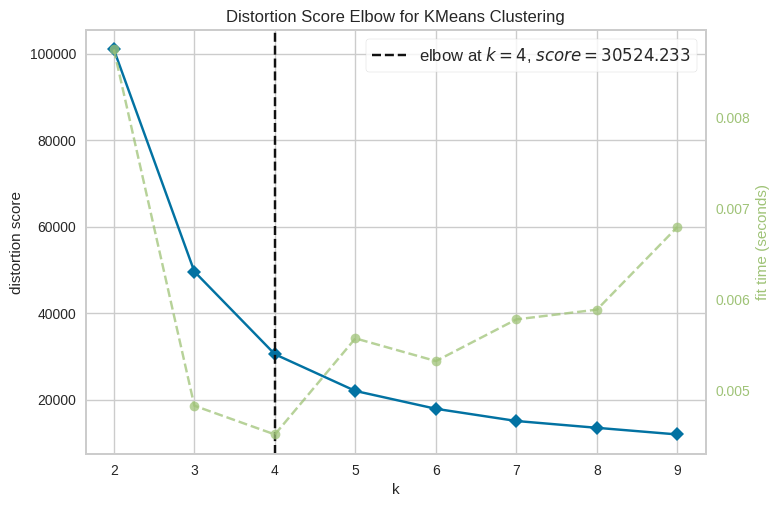

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [480]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df.select_dtypes(include=['float64','int64']))
visualizer.show()

In [481]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

In [482]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

In [483]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(df.drop('Cluster', axis=1), kmeans.labels_)
sil_score

np.float64(0.5026850120366801)

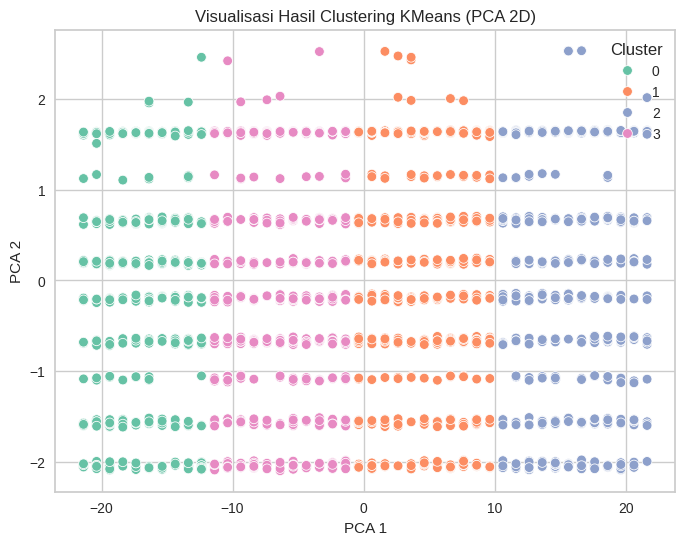

In [484]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Cluster'], palette="Set2")
plt.title("Visualisasi Hasil Clustering KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [485]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('Cluster', axis=1))
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_2 = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(PCA_2)

KMeans(n_clusters=4, random_state=42)

In [486]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

In [487]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby('Cluster').agg(['mean', 'min', 'max', 'median'])

TransactionAmount                               TransactionType      \
                     mean       min       max    median            mean min   
Cluster                                                                       
0                0.152503  0.000031  0.954092  0.109016        0.809434   0   
1                0.152486  0.000000  0.918269  0.105834        0.783094   0   
2                0.156869  0.000599  1.000000  0.106470        0.766613   0   
3                0.157587  0.000099  0.840144  0.120072        0.799358   0   

                     Location      ... LoginAttempts        AccountBalance  \
        max median       mean min  ...           max median           mean   
Cluster                            ...                                       
0         2    1.0   4.588679   0  ...           1.0    0.0       0.337671   
1         2    1.0  26.057416  21  ...           1.0    0.0       0.332462   
2         2    1.0  37.406807  32  ...           1.0    0.0       0.334468   
3         2    1.0  15.069021  10  ...           1.0    0.0       0.337498   

                                      AccountBalance_Binned                 
              min       max    median                  mean min max median  
Cluster                                                                     
0        0.001885  0.997144  0.326330              0.603774   0   2    0.0  
1        0.000774  0.988352  0.312263              0.598086   0   2    0.0  
2        0.000000  1.000000  0.273670              0.585089   0   2    0.0  
3        0.001125  0.997633  0.309810              0.611557   0   2    0.0  

[4 rows x 40 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: (Nasabah memiliki transaksi kecil dan akun aktif sedang)**
*   Rata-rata (mean) TransactionAmount: 0.1525
* Rata-rata (mean) TransactionType: 0.8094
* Rata-rata (mean) Location: 4.5887
* Rata-rata (mean) LoginAttempts: 1.0
* Rata-rata (mean) AccountBalance: 0.3377
* Rata-rata (mean) AccountBalance_Binned: 0.6038
* Analisis: Cluster ini mencakup nasabah yang melakukan transaksi dalam jumlah kecil hingga menengah dengan jenis transaksi dominan tipe debit. Lokasi transaksi relatif terbatas, menandakan pola aktivitas lokal. Aktivitas login normal dan saldo akun menengah. Strategi yang tepat untuk cluster ini adalah menawarkan paket promosi rutin atau transaksi hemat, serta edukasi penggunaan aplikasi untuk meningkatkan frekuensi transaksi.
2. **Cluster 1: (Nasabah memiliki transaksi kecil dengan variasi lokasi)**
* Rata-rata (mean) TransactionAmount: 0.1525
* Rata-rata (mean) TransactionType: 0.7831
* Rata-rata (mean) Location: 26.0574
* Rata-rata (mean) LoginAttempts: 1.0
* Rata-rata (mean) AccountBalance: 0.3325
* Rata-rata (mean) AccountBalance_Binned: 0.5981
* Analisis: Nasabah ini serupa dengan Cluster 0, tetapi bertransaksi di lebih banyak lokasi, menandakan mobilitas tinggi atau penggunaan layanan multi-lokasi. Aktivitas login normal dan saldo menengah. Rekomendasinya adalah personalisasi promosi berbasis lokasi, dan penawaran fitur multi-lokasi atau reward untuk transaksi di lokasi baru.
3. **Cluster 2: (Nasabah melakukan transaksi menengah dengan aktivitas tinggi)**
* Rata-rata (mean) TransactionAmount: 0.1569
* Rata-rata (mean) TransactionType: 0.7666
* Rata-rata (mean) Location: 37.4068
* Rata-rata (mean) LoginAttempts: 1.0
* Rata-rata (mean) AccountBalance: 0.3345
* Rata-rata (mean) AccountBalance_Binned: 0.5851
* Analisis: Nasabah ini melakukan transaksi menengah dengan frekuensi login tinggi, menunjukkan keterlibatan aktif. Lokasi transaksi cukup luas, menandakan mobilitas tinggi. Saldo akun menengah stabil, mendukung kemampuan transaksi rutin. Strategi yang disarankan adlah program loyalitas, reward untuk transaksi rutin, atau bundling produk.
4. **Cluster 3: (Nasabah memiliki transaksi menengah dengan saldo tinggi)**
* Rata-rata (mean) TransactionAmount: 0.1576
* Rata-rata (mean) TransactionType: 0.7994
* Rata-rata (mean) Location: 15.0690
* Rata-rata (mean) LoginAttempts: 1.0
* Rata-rata (mean) AccountBalance: 0.3075
* Rata-rata (mean) AccountBalance_Binned: 0.6116
* Analisis: Cluster ini memiliki saldo akun lebih tinggi dibanding cluster lain dengan transaksi menengah. Aktivitas login dan lokasi relatif sedang, menandakan nasabah yang stabil dan loyal. Rekomendasi yang dapat dilakukan adalah menawarkan produk investasi atau perbankan premium, paket VIP, dan promosi eksklusif untuk meningkatkan retensi dan potensi revenue.




# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [488]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [489]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

In [490]:
# inverse dataset ke rentang normal untuk numerikal
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountBalance_Binned,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,1,2
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,3
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,0,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,2
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,0,1


In [491]:
# inverse dataset yang sudah diencode ke kategori aslinya.
df_inverse = df.copy()
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_cols:
    encoder = encoders[col]
    if np.issubdtype(df_inverse[col].dtype, np.number):
        df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountBalance_Binned,Target
0,27036.8565,Debit,San Diego,ATM,4358.0,Doctor,23500.0,5.0,7.605312e+07,1,2
1,721948.3840,Debit,Houston,ATM,4234.0,Doctor,40900.0,5.0,2.046878e+08,2,3
2,242331.8265,Debit,Mesa,Online,1196.0,Student,16250.0,5.0,1.669701e+07,0,1
3,354028.0850,Debit,Raleigh,Online,1630.0,Student,7260.0,5.0,1.274798e+08,1,2
5,176822.2875,Debit,Oklahoma City,ATM,1134.0,Student,49890.0,5.0,1.162895e+07,0,1


In [492]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numerical_cols = df_inverse.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_inverse.select_dtypes(include=['object']).columns
numerical_summary = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max', 'median'])
categorical_summary = df_inverse.groupby('Target')[categorical_cols].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

numerical_summary, categorical_summary

(       TransactionAmount                                         CustomerAge  \
                     mean        min           max        median         mean   
 Target                                                                         
 0          562013.214027   614.2920  3.513453e+06  401893.79825  2833.618868   
 1          561948.825699   499.1610  3.381551e+06  390179.21900  2825.007974   
 2          578089.089532  2705.8385  3.682484e+06  392520.21600  2708.418152   
 3          580730.418049   863.7425  3.093896e+06  442602.20100  2778.343499   
 
                                TransactionDuration          ... LoginAttempts  \
            min     max  median                mean     min  ...           max   
 Target                                                      ...                 
 0       1134.0  4978.0  2870.0        34743.792453  2910.0  ...          21.0   
 1       1134.0  4978.0  2932.0        34336.379585  2910.0  ...          21.0   
 2       1134.0  4978

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah memiliki transaksi menengah dengan usia lebih muda dan akun aktif sedang)**
* Rata-rata (mean) TransactionAmount: 562,013
* Rata-rata (mean) CustomerAge: 2,834
* Rata-rata (mean) TransactionDuration: 34,744 detik
* Rata-rata (mean) LoginAttempts: 5
* Rata-rata (mean) AccountBalance: 76,238,730
* Rata-rata (mean) AccountBalance_Binned: 0.604
* Dominasi TransactionType: Debit
* Lokasi dan Channel: Charlotte, Branch
* Pekerjaan: Student
* Analisis: Cluster ini terdiri dari nasabah muda, mahasiswa atau pelajar, dengan transaksi menengah dan akun aktif secara moderat. Aktivitas login normal dan saldo akun stabil. Strategi yang cocok untuk cluster ini adalah menawarkan program edukasi finansial, produk tabungan mahasiswa, atau promosi transaksi rutin di cabang lokal.
2. **Cluster 1: (Nasabah memiliki transaksi menengah dengan variasi lokasi dan akun aktif sedang)**
* Rata-rata (mean) TransactionAmount: 561,949
* Rata-rata (mean) CustomerAge: 2,825
* Rata-rata (mean) TransactionDuration: 34,336 detik
* Rata-rata (mean) LoginAttempts: 5
* Rata-rata (mean) AccountBalance: 75,085,910
* Rata-rata (mean) AccountBalance_Binned: 0.598
* Dominasi TransactionType: Debit
* Lokasi dan Channel: Oklahoma City, Branch
* Pekerjaan: Student
* Analisis: Cluster ini mirip dengan cluster 0, namun tersebar di lokasi yang lebih bervariasi. Transaksi tetap menengah, aktivitas login normal, dan saldo akun menengah. Strategi yang efektif adalah personalisasi layanan berbasis lokasi, promosi cabang, dan pemberian reward untuk transaksi rutin.
3. **Cluster 2: (Nasabah dengan transaksi menengah hingga tinggi dan usia sedikit lebih tua)**
* Rata-rata (mean) TransactionAmount: 578,089
* Rata-rata (mean) CustomerAge: 2,708
* Rata-rata (mean) TransactionDuration: 33,869 detik
* Rata-rata (mean) LoginAttempts: 5
* Rata-rata (mean) AccountBalance: 75,530,040
* Rata-rata (mean) AccountBalance_Binned: 0.585
* Dominasi TransactionType: Debit
* Lokasi dan Channel: Tucson, Branch
* Pekerjaan: Doctor
* Analisis: Nasabah di cluster ini cenderung memiliki kemampuan finansial lebih stabil, dengan transaksi menengah ke tinggi dan akun aktif. Targetkan promosi untuk produk investasi, layanan keuangan premium, atau paket loyalitas bagi nasabah profesional.
4. **Cluster 3: (Nasabah dengan transaksi menengah dan saldo akun tinggi)**
* Rata-rata (mean) TransactionAmount: 580,730
* Rata-rata (mean) CustomerAge: 2,778
* Rata-rata (mean) TransactionDuration: 35,713 detik
* Rata-rata (mean) LoginAttempts: 5
* Rata-rata (mean) AccountBalance: 76,200,470
* Rata-rata (mean) AccountBalance_Binned: 0.612
* Dominasi TransactionType: Debit
* Lokasi dan Channel: Fort Worth, Branch
* Pekerjaan: Doctor
* Analisis: Cluster ini memiliki saldo akun tertinggi di antara semua cluster dan transaksi menengah. Nasabah ini berpotensi sebagai klien premium. Strategi yang disarankan adalah menawarkan produk perbankan eksklusif, investasi, dan layanan personal yang menargetkan peningkatan retensi dan engagement.

In [493]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = df['Target']

In [494]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)